In [97]:
import sys
import os
import uproot
import matplotlib as mpl
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import awkward as ak
import random

## Set Up and Load the DataFrame

In [9]:
# List of variables to include in the DataFrame

# variables = ['selected', 'evt', 'sub', 'run', 'nslice', 'shr_energy_tot_cali','_opfilter_pe_beam',
#              '_opfilter_pe_veto','slice_orig_pass_id','n_tracks_contained', 'truthFiducial', 'npi0', 'elec_e',
#             'CosmicIPAll3D', 'hits_ratio', 'shrmoliereavg', 'subcluster', 'trkfit', 'tksh_distance', #'shr_tkfit_nhits_tot',
#             'shr_tkfit_dedx_max', 'n_showers_contained', 'shr_tkfit_nhits_Y', 'shr_tkfit_nhits_U', 'shr_tkfit_nhits_V']

variables = ['evt', 'run', 'sub','slice_orig_pass_id', 'truthFiducial', 'npi0', 'elec_e', 
             'shr_tkfit_nhits_Y', 'shr_tkfit_nhits_U', 'shr_tkfit_nhits_V']

added_vars = ['shr_tkfit_nhits_tot', 'trksemlbl', 'trkpid']

new_loose_cut_variables = [
    'nslice',
    'selected',
    'shr_energy_tot_cali',
    '_opfilter_pe_beam',
    '_opfilter_pe_veto',
    'n_tracks_contained',
    'CosmicIPAll3D',
    'trksemlbl',
    'hits_ratio',
    'shrmoliereavg',
    'subcluster',
    'trkfit',
    'tksh_distance',
    'shr_tkfit_nhits_tot',
    'shr_tkfit_dedx_max',
    'n_showers_contained'
]

variables.extend(new_loose_cut_variables)
variables = list(set([var for var in variables if var not in added_vars]))
variables

['sub',
 'hits_ratio',
 'elec_e',
 '_opfilter_pe_veto',
 'shrmoliereavg',
 'shr_tkfit_nhits_V',
 'npi0',
 'subcluster',
 'nslice',
 'selected',
 '_opfilter_pe_beam',
 'run',
 'CosmicIPAll3D',
 'shr_energy_tot_cali',
 'shr_tkfit_dedx_max',
 'truthFiducial',
 'evt',
 'shr_tkfit_nhits_U',
 'n_tracks_contained',
 'trkfit',
 'tksh_distance',
 'slice_orig_pass_id',
 'n_showers_contained',
 'shr_tkfit_nhits_Y']

In [10]:
# Load one file for easier viewing
t = uproot.open('DetVar/v01/prodgenie_bnb_intrinsic_nue_overlay_DetVar_CV_reco2_v08_00_00_38_run1_reco2_reco2.root')['nuselection']['NeutrinoSelectionFilter']
df = t.arrays(variables, library="pd")
df.sort_values(by=['run','evt']).head(25)

,sub,hits_ratio,elec_e,_opfilter_pe_veto,shrmoliereavg,shr_tkfit_nhits_V,npi0,subcluster,nslice,selected,...,shr_tkfit_dedx_max,truthFiducial,evt,shr_tkfit_nhits_U,n_tracks_contained,trkfit,tksh_distance,slice_orig_pass_id,n_showers_contained,shr_tkfit_nhits_Y
26905,67,0.000000,0.964566,0.0,-3.402408e+38,0,0,2147483648,0,0,...,-3.402823e+38,False,3371,0,0,1.000000,-3.402823e+38,0,0,0
26906,67,1.000000,0.128056,0.0,3.851074e+00,0,0,8,1,1,...,1.834861e+00,True,3380,2,0,0.110619,3.022484e+02,1,1,4
26907,67,0.000000,1.881477,0.0,-3.402408e+38,0,0,2147483648,0,0,...,-3.402823e+38,False,3387,0,0,1.000000,-3.402823e+38,1,0,0
26908,67,1.000000,1.795105,0.0,6.402344e+00,5,0,19,1,1,...,2.030725e+00,True,3390,5,0,0.347054,9.708457e+02,0,1,11
14233,50,0.811594,0.449960,0.0,1.757422e+01,10,0,3,1,0,...,2.964928e+00,False,2527,0,0,0.660714,1.759818e+00,0,0,8
14234,51,0.865239,0.648535,0.0,5.437500e+00,1,0,24,1,1,...,7.098595e+00,True,2577,8,1,0.058224,3.859823e+00,1,1,9
14235,52,0.000000,0.231331,0.0,-3.402408e+38,0,0,2147483648,0,0,...,-3.402823e+38,False,2615,0,0,1.000000,-3.402823e+38,0,0,0
14236,52,0.942789,0.300216,0.0,6.970703e+00,8,1,20,1,1,...,3.107745e+00,False,2621,10,2,0.191651,3.811536e+00,1,3,2
14237,52,0.000000,0.797621,0.0,-3.402408e+38,0,0,2147483648,1,0,...,-3.402823e+38,False,2633,0,0,1.000000,-3.402823e+38,0,0,0
14238,53,0.834505,1.120504,0.0,4.864258e+00,9,0,41,1,0,...,5.157641e+00,False,2656,0,0,0.235393,9.973590e-01,1,1,9


In [4]:
t.keys()

['selected',
 'run',
 'sub',
 'evt',
 'trk_id',
 'shr_id',
 'trk2_id',
 'shr2_id',
 'trk3_id',
 'shr3_id',
 'shr_energy_tot',
 'shr_energy',
 'shr_energy_second',
 'shr_energy_third',
 'shr_energy_tot_cali',
 'shr_energy_cali',
 'shr_energy_second_cali',
 'shr_energy_third_cali',
 'shr_theta',
 'shr_phi',
 'shr_pca_0',
 'shr_pca_1',
 'shr_pca_2',
 'shr_px',
 'shr_py',
 'shr_pz',
 'shr_openangle',
 'shr_tkfit_start_x',
 'shr_tkfit_start_y',
 'shr_tkfit_start_z',
 'shr_tkfit_theta',
 'shr_tkfit_phi',
 'shr_start_x',
 'shr_start_y',
 'shr_start_z',
 'shr_dedx_Y',
 'shr_dedx_V',
 'shr_dedx_U',
 'shr_dedx_Y_cali',
 'shr_dedx_V_cali',
 'shr_dedx_U_cali',
 'shr_tkfit_dedx_Y',
 'shr_tkfit_dedx_V',
 'shr_tkfit_dedx_U',
 'shr_tkfit_dedx_max',
 'shr_tkfit_nhits_Y',
 'shr_tkfit_nhits_V',
 'shr_tkfit_nhits_U',
 'shr_llrpid_dedx_Y',
 'shr_llrpid_dedx_V',
 'shr_llrpid_dedx_U',
 'shr_llrpid_dedx',
 'shr_tkfit_dedx_Y_alt',
 'shr_tkfit_dedx_V_alt',
 'shr_tkfit_dedx_U_alt',
 'shr_tkfit_nhits_Y_alt',
 'sh

In [11]:
# Set the files to grab nue data

directory = 'DetVar/v01/'

file_names = [
#               'prodgenie_bnb_intrinsic_nue_overlay_detvar_sce_reco2_run1_reco2_reco2.root',
              'prodgenie_bnb_intrinsic_nue_overlay_DetVar_wiremod_ScaledEdX_v08_00_00_42_run1_reco2_reco2.root',
              'prodgenie_bnb_intrinsic_nue_overlay_DetVar_wiremod_ScaleX_v08_00_00_42_run1_reco2_reco2.root',
              'prodgenie_bnb_intrinsic_nue_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_42_run1_reco2_reco2.root',
              'prodgenie_bnb_intrinsic_nue_overlay_DetVar_WireModAngleXZ_v08_00_00_42_run1_reco2_reco2.root',
#               'prodgenie_bnb_intrinsic_nue_overlay_DetVar_WireModAngleYZ_v08_00_00_42_run1_reco2_reco2.root'
#               'dontuse_____prodgenie_bnb_intrinsic_nue_overlay_DetVar_wiremod_ScaleX_v08_00_00_42_run1_reco2_reco2.root'
              'prodgenie_bnb_intrinsic_nue_overlay_DetVar_CV_reco2_v08_00_00_38_run1_reco2_reco2.root'
             ]

variation_titles = [ 
#                     'sce', 
                    'wiremod_ScaledEdX', 
                    'wiremod_ScaleX', 
                    'wiremod_ScaleYZ', 
                    'WireModAngleXZ', 
#                     'WireModAngleYZ'
#                     'wiremod_ScaleX (10%)'
                    'CV'
                   ]

mode = 'Nue'

In [12]:
# Set the files to grab pi0 data (cuts are different so dont use)

# directory = 'DetVar/v00/'

# file_names = ['prodgenie_nc_pi0_overlay_DetVar_CV_reco2_v08_00_00_38_run3a_reco2_reco2.root',
# #               'prodgenie_nc_pi0_overlay_DetVar_SCE_reco2_v08_00_00_38_run3a_reco2_reco2.root',
#               'prodgenie_nc_pi0_overlay_DetVar_wiremod_ScaledEdX_v08_00_00_39_run3a_reco2_reco2.root',
#               'prodgenie_nc_pi0_overlay_DetVar_wiremod_ScaleX_v08_00_00_38_run3a_reco2_reco2.root',
# #               'prodgenie_nc_pi0_overlay_DetVar_wiremod_ScaleYZ_v08_00_00_38_run3a_reco2_reco2.root',
#               'prodgenie_nc_pi0_overlay_DetVar_WireModAngleXZ_v08_00_00_38_run3a_reco2_reco2.root',
#               'prodgenie_nc_pi0_overlay_DetVar_WireModAngleYZ_v08_00_00_38_run3a_reco2_reco2.root'
#              ]

# variation_titles = ['CV', 
# #                     'sce', 
#                     'wiremod_ScaledEdX', 
#                     'wiremod_ScaleX', 
# #                     'wiremod_ScaleYZ', 
#                     'WireModAngleXZ', 
#                     'WireModAngleYZ'
#                    ]

# mode='Pi0'

In [13]:
# Util functions

def get_elm_from_vec_idx(myvec, idx, fillval=np.nan):
    """Returns the element of a vector at position idx, where idx is a vector of indices. If idx is out of bounds, returns a filler value"""
    return np.array([pidv[tid] if ((tid < len(pidv)) & (tid >= 0)) else fillval for pidv, tid in zip(myvec, idx)])

def get_idx_from_vec_sort(argidx, vecsort, mask):
    """Returns the index of the element of a vector at position argidx, where argidx is a vector of indices. If argidx is out of bounds, returns -1."""
    vid = vecsort[mask]
    sizecheck = argidx if argidx >= 0 else abs(argidx) - 1
    # find the position in the array after masking
    mskd_pos = [ak.argsort(v)[argidx] if len(v) > sizecheck else -1 for v in vid]
    # go back to the corresponding position in the origin array before masking
    result = [[i for i, n in enumerate(m) if n == 1][p] if (p) >= 0 else -1 for m, p in zip(mask, mskd_pos)]
    return result

In [14]:
# Get all of the DataFrames into a list

df_list = []

for file in file_names:
    
    file_name = f'{directory}{file}'
    t = uproot.open(file_name)['nuselection']['NeutrinoSelectionFilter']
    df = t.arrays(variables, library="pd")
    
    # Add trksemblbl and trkpid to the DataFrame
    trk_id_o = t.arrays(["trk_id"], library="np")["trk_id"] - 1 #2k sample
    pfng2semlabel = t.arrays(["pfng2semlabel"])["pfng2semlabel"]
    trk_pfng2semlabel_sel = get_elm_from_vec_idx(pfng2semlabel, trk_id_o)
    df["trksemlbl"] = trk_pfng2semlabel_sel

    trk_llr_pid_v = t.arrays(["trk_llr_pid_score_v"])["trk_llr_pid_score_v"]
    trk_id = t.arrays(["trk_id"], library="np")["trk_id"] - 1
    trk_llr_pid_v_sel = get_elm_from_vec_idx(trk_llr_pid_v, trk_id)
    df["trkpid"] = trk_llr_pid_v_sel
    
    # Add unique event identifier to the DataFrame
    df['ident_id'] = df['run'] * 100000 + df['evt']
    
    # Add shr_tkfit_nhits_tot to the DataFrame
    df['shr_tkfit_nhits_tot'] = df['shr_tkfit_nhits_Y'] + df['shr_tkfit_nhits_U'] + df['shr_tkfit_nhits_V']
    
    # Fix unsigned columns so that differences are two-sided
    uint_cols = np.unique(df.select_dtypes(include=['uint32']).columns.to_numpy())
    df[uint_cols] = df[uint_cols].astype('int32')
    
    # Reindex based on the unique event-run value
    df = df.set_index('ident_id')

    df_list.append(df)

## Filter out events that are shared between CV and DetVar

In [53]:
cv_index = df_list[-1].index # Assume CV is the last in the list

share_rate = []
shared_index = []
shared_index_all = cv_index

for i in range(len(df_list)):
    
    # Filter out specific events of interest
    df_before = df_list[i]
    df_before = df_before[df_before['truthFiducial'] == True] 
    df_before = df_before[df_before['npi0'] == 0]
    cv_before = df_list[-1]
    cv_before = cv_before[cv_before['truthFiducial'] == True]
    cv_before = cv_before[cv_before['npi0'] == 0]
    
    # Perform Preselection
    df_pre = df_before
    df_pre = df_pre[df_pre['nslice'] == 1] 
    df_pre = df_pre[df_pre['selected'] == 1]
    df_pre = df_pre[df_pre['shr_energy_tot_cali'] > 0.07]
    df_pre = df_pre[(df_pre['_opfilter_pe_beam'] > 0) & (df_pre['_opfilter_pe_veto'] < 20)]
    cv_pre = cv_before
    cv_pre = cv_pre[cv_pre['nslice'] == 1] 
    cv_pre = cv_pre[cv_pre['selected'] == 1] 
    cv_pre = cv_pre[cv_pre['shr_energy_tot_cali'] > 0.07] 
    cv_pre = cv_pre[(cv_pre['_opfilter_pe_beam'] > 0) & (cv_pre['_opfilter_pe_veto'] < 20)] 
    
    df_use = df_pre
    cv_use = cv_pre
    
    num_total_events = len(df_use.index) # Number of events before intersection
    
    shared_index.append(df_use.index.intersection(cv_use.index)) # Store the index intersection
    shared_index_all = shared_index_all.intersection(df_use.index)
    
    num_shared_events = len(shared_index[i]) # Number of events after intersection
    
    share_rate.append(num_shared_events / num_total_events)
    
print(f'Of the {len(cv_index)} total CV events, they are reduced by preselection and then have this ratio is shared with DetVar:\n {share_rate}')
print(f'{len(shared_index_all)} events are shared between all variations')

Of the 88471 total CV events, they are reduced by preselection and then have this ratio is shared with DetVar:
 [0.9009224958233457, 0.8986918604651163, 0.8987864517297591, 0.9113814700165574, 1.0]
16698 events are shared between all variations


## Remove special values from shared_index

In [54]:
# May error on the first time since it relies on var and bins that are initialized later
removeSpecial = True

if np.all([len(i)==0 for i in shared_index[:-1]]):
    removeSpecial = False
    print("Setting to False")

if removeSpecial:
    
    og_shared_index = shared_index[:]
    
    for i in range(len(df_list)-1):
        
        cv_share = df_list[-1].loc[shared_index[i]]
        detvar_share = df_list[i].loc[shared_index[i]]
        
        shared_index[i] = shared_index[i].intersection(cv_share[~cv_share[var].isin(special)].index)
        shared_index[i] = shared_index[i].intersection(cv_share[~cv_share[var2].isin(special2)].index)
        shared_index[i] = shared_index[i].intersection(detvar_share[~detvar_share[var].isin(special)].index)
        shared_index[i] = shared_index[i].intersection(detvar_share[~detvar_share[var2].isin(special2)].index)     
        
else:
    
    shared_index = og_shared_index[:]

## Make new set of indices that section off first variable points

In [55]:
# May error on the first time since it relies on var and bins that are initialized later
sectioned_index = []

# section = -0.1 # Percentage distance from 0 that gets sectioned off (negative means on the low side, positive on the high side)
section_label = '<>' # Which direction to cut
section_value = 0.3 # Which value to cut on (interpretation depends on uncommented code below)

def performSectioning():
    
    sectioned_index.clear()

    for i in range(len(df_list)-1):

        detvar = df_list[i].loc[shared_index[i]][var]
        cv = df_list[-1].loc[shared_index[i]][var]

#         error = ( detvar - cv ) / cv
        error = (detvar - cv)/np.max(bins)

        if section_label == '>':
            new_index = df_list[i].loc[shared_index[i]][error > section_value].index
        elif section_label == '<':
            new_index = df_list[i].loc[shared_index[i]][error < section_value].index
        elif section_label == '<>':
            new_index = df_list[i].loc[shared_index[i]][error < -1*section_value].index
            new_index = new_index.union(df_list[i].loc[shared_index[i]][error > section_value].index)
        elif section_label == '=':
            new_index = df_list[i].loc[shared_index[i]][error == section_value].index
        else:
            new_index = shared_index[i] # Should cause no change

#         error = detvar - cv

#         if section == '+':
#             new_index = df_list[i].loc[shared_index[i]][error > 0].index
#         elif section == '-':
#             new_index = df_list[i].loc[shared_index[i]][error < 0].index
#         else:
#             new_index = shared_index[i] # Should cause no change

        sectioned_index.append(shared_index[i].intersection(new_index))
        
performSectioning()

## Calculate Differences

In [56]:
# Pick all of the variables for now (can reduce later)

selected_vars = list(np.copy(variables))
selected_vars.extend(added_vars)
selected_vars = list(set(selected_vars))

df_cv = df_list[-1][selected_vars]
df_diff_list = [] # Differences between detvar and CV (doesn't include CV compared with itself)
df_var_shared_list = [] # Values of DetVar with shared index with CV
df_cv_shared_list = [] # Values of CV with shared index with DetVar

for i in range(len(df_list)-1):
    
    df_var = df_list[i][selected_vars]
    
    df_var_filtered = df_var.loc[shared_index[i]]
    
    df_cv_filtered = df_cv.loc[shared_index[i]]
    
    # And a sign to unsigned datatype columns so that the diff is two-sided
    # And turn boolean values into integers to allow for subtraction
    uint_cols = np.unique(df_var_filtered.select_dtypes(include=['uint32', 'bool']).columns.to_numpy())
    df_var_filtered[uint_cols] = df_var_filtered[uint_cols].astype('int32')
    
#     print(df_var_filtered.dtypes)

    df_var_shared_list.append(df_var_filtered)
    df_cv_shared_list.append(df_cv_filtered)
    
    df_diff = df_var_filtered.sub(df_cv_filtered, axis='columns') # Stores the difference between CV and DetVar
    df_diff_list.append(df_diff)

## Set Up Variable to Plot

In [70]:
var_bounds = {
    'hits_ratio': {
        'bins': np.linspace(0, 1, 20),
        'err_bins': np.linspace(-0.1, 0.1, 24),
        'limits': [0.40],
        'limit_tag' : '>',
        'special' : []
    },
    'shr_energy_tot_cali': {
        'bins': np.linspace(0, 2, 30),
        'err_bins': np.linspace(-0.075, 0.075, 24),
        'limits': [0.07],
        'limit_tag' : '>',
        'special' : []
    },
    'shrmoliereavg': {
        'bins': np.linspace(0, 50, 20),
        'err_bins': np.linspace(-1.25, 1.25, 20),
        'limits': [22],
        'limit_tag' : '<',
        'special' : []
    },
    'shr_tkfit_dedx_max': {
        'bins': np.linspace(0, 7, 20),
        'err_bins': np.linspace(-0.1, 0.1, 24),
        'limits': [1, 3],
        'limit_tag' : '>',
        'special' : []
    },
    'n_tracks_contained': {
        'bins': np.linspace(-0.5, 7.5, 9),
        'err_bins': np.linspace(-1.25, 1.25, 10),
        'limits': [1],
        'limit_tag' : '>',
        'special' : []
    },
    'subcluster': {
        'bins': np.linspace(-0.5, 50.5, 52),
        'err_bins': np.linspace(-1.25, 1.25, 20),
        'limits': [4],
        'limit_tag' : '>',
        'special' : []
    },
    'trkfit': {
        'bins': np.linspace(0, 1, 20),
        'err_bins': np.linspace(-2, 2, 20),
        'limits': [0.5],
        'limit_tag' : '<',
        'special' : []
    },
    'CosmicIPAll3D': {
        'bins': np.linspace(0, 10000, 20),
        'err_bins': np.linspace(-10000, 10000, 20),
        'limits': [0.5],
        'limit_tag' : '>',
        'special' : []
    },
    'n_showers_contained': {
        'bins': np.linspace(-0.5, 8.5, 10),
        'err_bins': np.linspace(-1.25, 1.25, 10),
        'limits': [1],
        'limit_tag' : '==',
        'special' : []
    },
    'tksh_distance': { # Has values at integer limit
        'bins': np.linspace(0, 15, 20),
        'err_bins': np.linspace(-2, 2, 20),
        'limits': [4],
        'limit_tag' : '<',
        'special' : []
    },
    'trksemlbl': {
        'bins': np.linspace(-0.5, 4.5, 6),
        'err_bins': np.linspace(-0.5, 4.5, 6),
        'limits': [1],
        'limit_tag' : '=',
        'special' : []
    },
    '_opfilter_pe_beam': {
        'bins': np.linspace(0, 300, 30),
        'err_bins': np.linspace(-0.25, 0.25, 20),
        'limits': [0],
        'limit_tag' : '>',
        'special' : []
    },
    '_opfilter_pe_veto': {
        'bins': np.linspace(0, 100, 30),
        'err_bins': np.linspace(-1, 1, 20),
        'limits': [20],
        'limit_tag' : '<',
        'special' : []
    },
    'shr_tkfit_nhits_tot': {
        'bins': np.linspace(-0.5, 30.5, 32),
        'err_bins': np.linspace(-2, 2, 20),
        'limits': [20],
        'limit_tag' : '<',
        'special' : []
    }
}

var = 'shr_tkfit_dedx_max'
var2 = 'shr_energy_tot_cali'

def getBounds(var):
    
    if var in var_bounds.keys():
        bins = var_bounds[var]['bins']
        err_bins = var_bounds[var]['err_bins']
        limits = var_bounds[var]['limits']
        limit_tag = var_bounds[var]['limit_tag']
        special = var_bounds[var]['special']
    else:
        diff_values = [[df[var].min(), df[var].max()] for df in df_diff_list]
        df_values = [[df[var].min(), df[var].max()] for df in df_list]

    #     print(df_list[-1][var].dtype)

        if df_list[-1][var].dtype in ['uint32','int32']:
            bin_min = np.round(np.min(df_values))-0.5
            bin_max = np.round(np.max(df_values))+0.5
            bins = np.linspace(bin_min, bin_max, int(bin_max - bin_min + 1))

            err_bin_min = np.round(np.min(diff_values))-0.5
            err_bin_max = np.round(np.max(diff_values))+0.5
            err_bins = np.linspace(err_bin_min, err_bin_max, int(err_bin_max - err_bin_min + 1))
        else:
            bins = np.linspace(np.min(df_values), np.max(df_values),20)
            err_bins = np.linspace(np.min(diff_values), np.max(df_values),20)

        limits = []
        limit_tag = ''
        special = []

        print(bins)
        print(err_bins)
    
    bin_centers = (bins[:-1]+bins[1:])/2
    bin_width = bins[1]-bins[0]

    err_bin_centers = (err_bins[:-1]+err_bins[1:])/2
    err_bin_width = err_bins[1]-err_bins[0]
        
    return bins, err_bins, limits, limit_tag, special, bin_centers, bin_width, err_bin_centers, err_bin_width

bins, err_bins, limits, limit_tag, special, bin_centers, bin_width, err_bin_centers, err_bin_width = getBounds(var)
bins2, err_bins2, limits2, limit_tag2, special2, bin_centers2, bin_width2, err_bin_centers2, err_bin_width2 = getBounds(var2)

performSectioning()


## Create Errorbar Plots (for first variable)

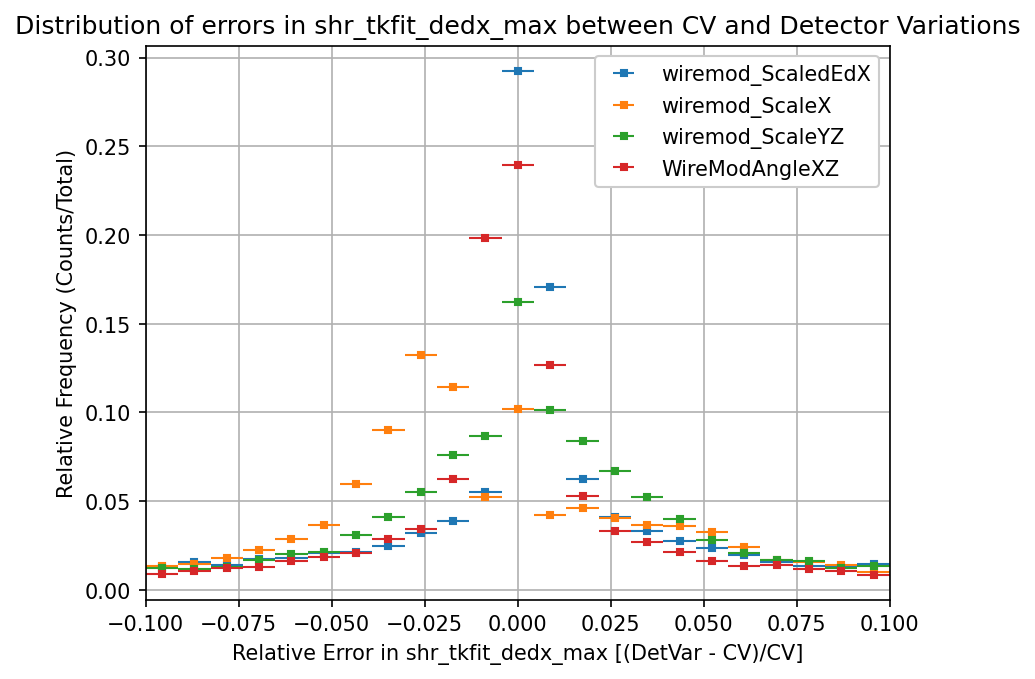

In [71]:
labels = variation_titles[:-1]
linestyles = ('-',':','.-','--')

rel_errors = [] # Store the relative errors for sectioning

err_fig, err_ax = plt.subplots(dpi=150)
    
for i in range(len(df_list)-1):
    
    detvar = df_list[i].loc[shared_index[i]][var]
    cv = df_list[-1].loc[shared_index[i]][var]
    
    relative_error = ( detvar - cv ) / cv
    
    rel_errors.append(relative_error)
    
    hist = np.histogram(relative_error,err_bins)[0]
    
    err_ax.errorbar(err_bin_centers,hist/sum(hist),xerr=err_bin_width/2,ls='none',marker='s',ms=2.5,lw=1,label=labels[i])
#     err_ax.stairs(hist/sum(hist), err_bins, label=labels[i])
    
# err_ax.axvline(section_value, ls='--',c='k', linewidth=0.8)
    
err_ax.grid(True)
err_ax.legend(framealpha=1)
err_ax.set_xlim(min(err_bins), max(err_bins))
err_ax.set_title(f'Distribution of errors in {var} between CV and Detector Variations')
err_ax.set_ylabel('Relative Frequency (Counts/Total)')
err_ax.set_xlabel(f'Relative Error in {var} [(DetVar - CV)/CV]');

## Create 2D Histograms (for first variable)

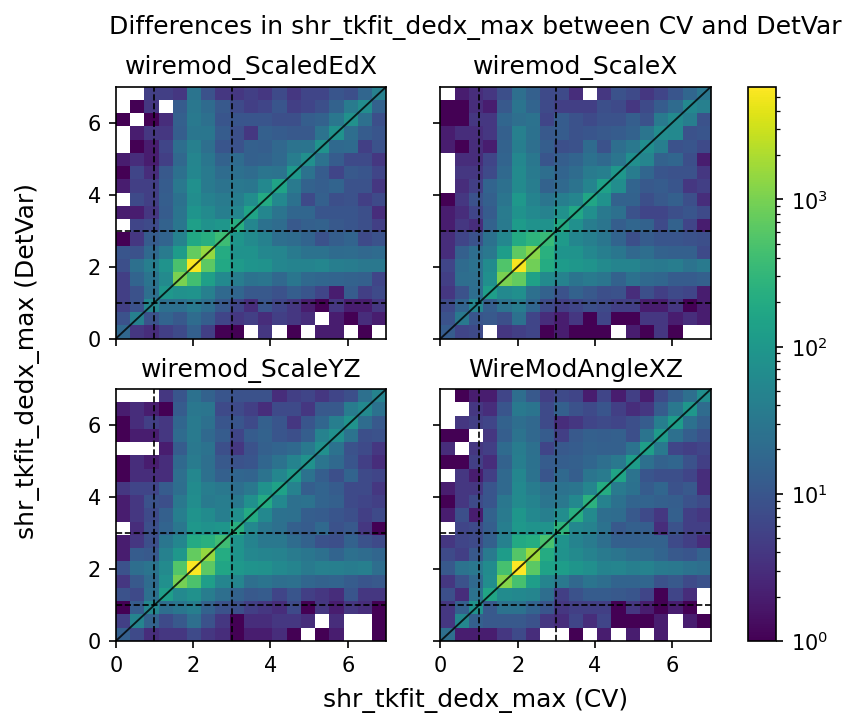

In [72]:
hist2d_fig, hist2d_axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=150)

axs = hist2d_axs.flatten()

# Get the maximum bin value to set as the vmax
vmax = 10
for i in range(len(df_list)-1):
    vmax = max(vmax, np.max(np.histogram2d(df_list[-1].loc[shared_index[i]][var], df_list[i].loc[shared_index[i]][var], bins=bins)[0]))

for i in range(len(df_list)-1):
    
    _,_,_,im = axs[i].hist2d(df_list[-1].loc[shared_index[i]][var], df_list[i].loc[shared_index[i]][var], 
                             bins=bins, norm=mpl.colors.LogNorm(vmax=vmax))
    
    
    axs[i].set_title(f'{variation_titles[i]}')
    
    for limit in limits: 
        axs[i].axvline(limit, ls='--',c='k', linewidth=0.8)
        axs[i].axhline(limit, ls='--',c='k', linewidth=0.8)
    
#     axs[i].set_ylabel(f'{var} (DetVar)')

    # Add diagonal line
    axs[i].plot([min(bins),max(bins)], [min(bins),max(bins)], linestyle='-', c='k', linewidth=0.9, alpha=0.8)

hist2d_fig.supylabel(f'{var} (DetVar)')
hist2d_fig.supxlabel(f'{var} (CV)')
hist2d_fig.suptitle(f'Differences in {var} between CV and DetVar')

hist2d_fig.colorbar(im, ax=axs.ravel().tolist());
    
# plt.tight_layout()

## Create 2D Histograms (for first variable) based on first variable section

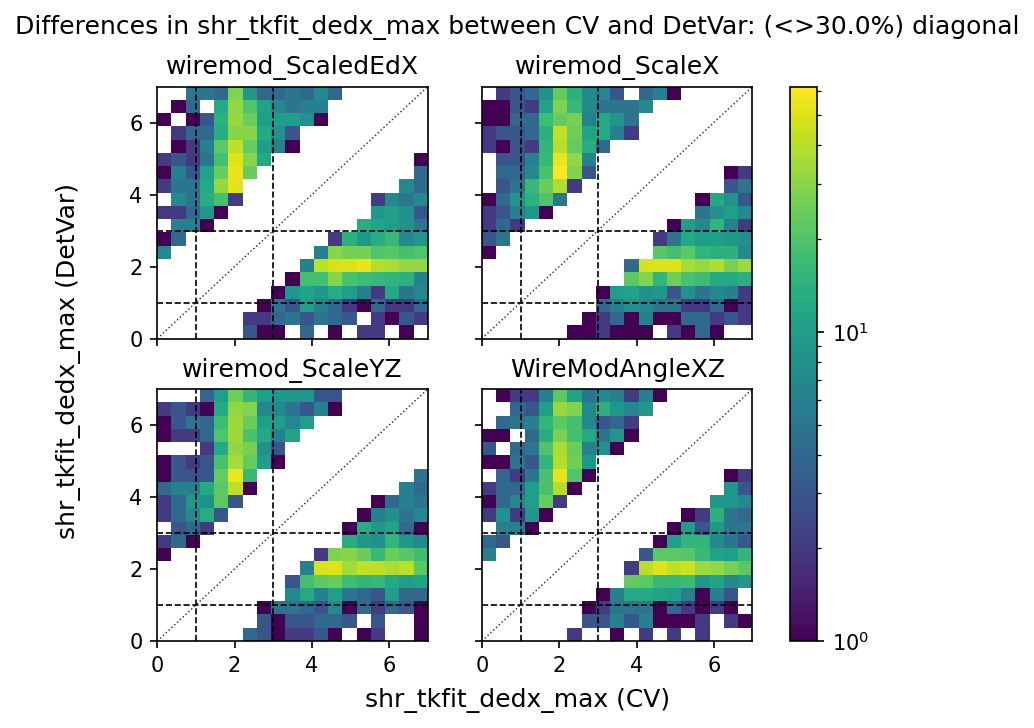

In [73]:
hist2d_fig, hist2d_axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=150)

axs = hist2d_axs.flatten()

# Get the maximum bin value to set as the vmax
vmax = 10
for i in range(len(df_list)-1):
    vmax = max(vmax, np.max(np.histogram2d(df_list[-1].loc[sectioned_index[i]][var], df_list[i].loc[sectioned_index[i]][var], bins=bins)[0]))
    
for i in range(len(df_list)-1):
    
    _,_,_,im = axs[i].hist2d(df_list[-1].loc[sectioned_index[i]][var], df_list[i].loc[sectioned_index[i]][var], bins=bins, norm=mpl.colors.LogNorm(vmax=vmax))
    axs[i].set_title(f'{variation_titles[i]}')
    
    for limit in limits: 
        axs[i].axvline(limit, ls='--',c='k', linewidth=0.8)
        axs[i].axhline(limit, ls='--',c='k', linewidth=0.8)
    
#     axs[i].set_ylabel(f'{var} (DetVar)')

    # Add diagonal lines
    axs[i].plot([min(bins),max(bins)], [min(bins),max(bins)], linestyle=':', c='k', linewidth=0.7, alpha=0.8)
    if section_label in ['>', '<']:
        axs[i].plot([min(bins),max(bins)], [min(bins),max(bins)*(1+section_value)], linestyle='-', c='k', linewidth=0.9, alpha=0.8)
    
#     hist2d_fig.colorbar(im, ax=axs[i])

hist2d_fig.supylabel(f'{var} (DetVar)')
hist2d_fig.supxlabel(f'{var} (CV)')
hist2d_fig.suptitle(f'Differences in {var} between CV and DetVar: ({section_label}{section_value*100}%) diagonal')

hist2d_fig.colorbar(im, ax=axs.ravel().tolist());
    
# plt.tight_layout();

## Create 2D Histograms (for second variable)

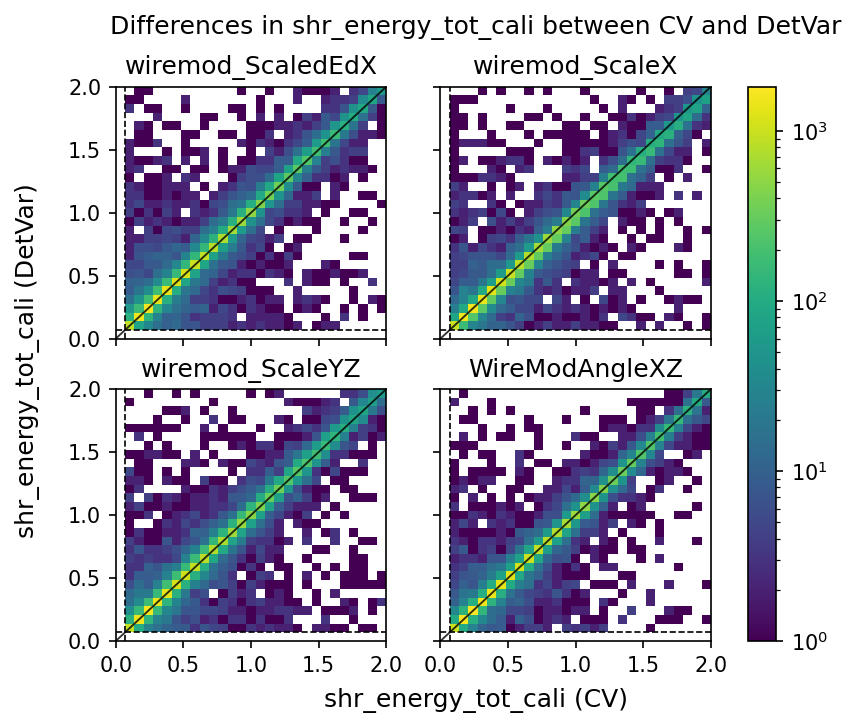

In [74]:
hist2d_fig, hist2d_axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=150)

axs = hist2d_axs.flatten()

# Get the maximum bin value to set as the vmax
vmax = 10
for i in range(len(df_list)-1):
    vmax = max(vmax, np.max(np.histogram2d(df_list[-1].loc[shared_index[i]][var2], df_list[i].loc[shared_index[i]][var2], bins=bins2)[0]))
      

for i in range(len(df_list)-1):
    
    _,_,_,im = axs[i].hist2d(df_list[-1].loc[shared_index[i]][var2], df_list[i].loc[shared_index[i]][var2], bins=bins2, norm=mpl.colors.LogNorm(vmax=vmax))
    axs[i].set_title(f'{variation_titles[i]}')
    
    for limit in limits2: 
        axs[i].axvline(limit, ls='--',c='k', linewidth=0.8)
        axs[i].axhline(limit, ls='--',c='k', linewidth=0.8)
    
#     axs[i].set_ylabel(f'{var} (DetVar)')

    # Add diagonal line
    axs[i].plot([min(bins2),max(bins2)], [min(bins2),max(bins2)], linestyle='-', c='k', linewidth=0.9, alpha=0.8)

hist2d_fig.supylabel(f'{var2} (DetVar)')
hist2d_fig.supxlabel(f'{var2} (CV)')
hist2d_fig.suptitle(f'Differences in {var2} between CV and DetVar')

hist2d_fig.colorbar(im, ax=axs.ravel().tolist());
    
# plt.tight_layout()

## Create 2D Histograms (for second variable) based on first variable section

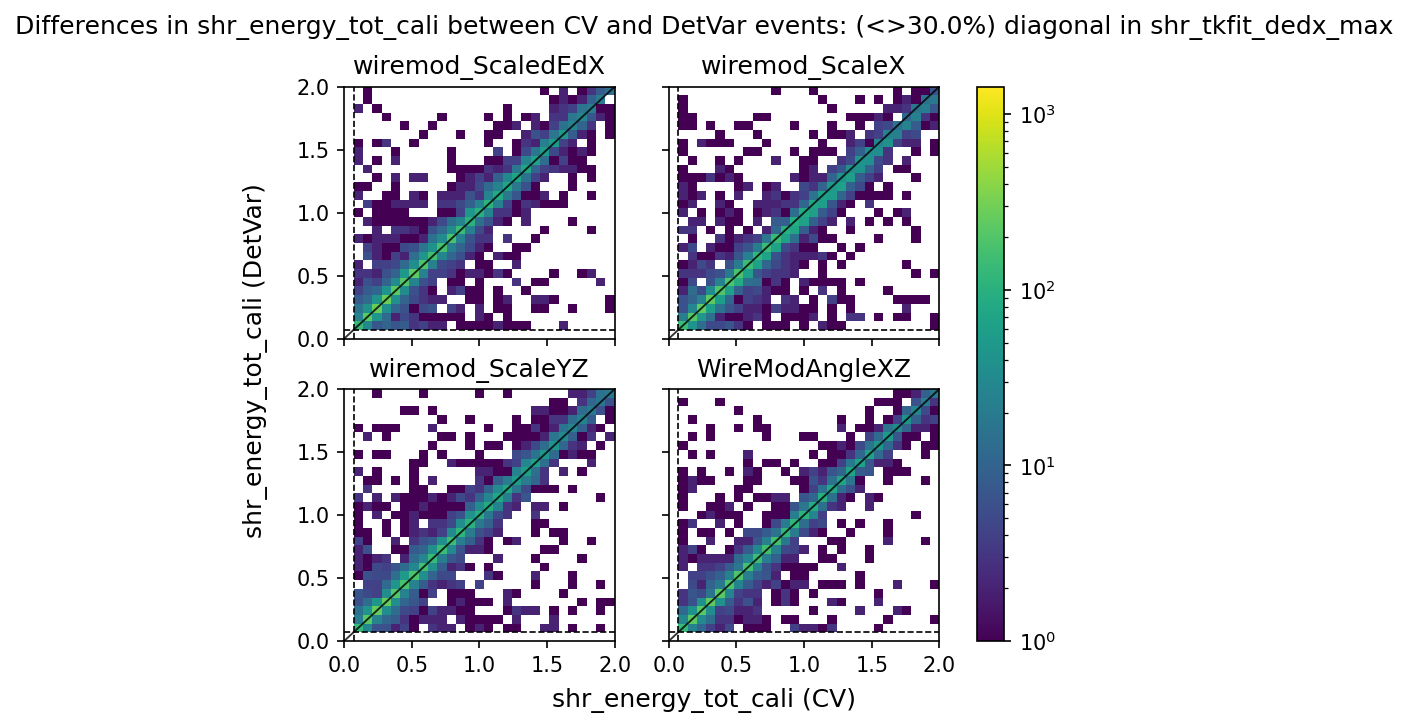

In [75]:
hist2d_fig, hist2d_axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, dpi=150)

axs = hist2d_axs.flatten()

# Get the maximum bin value to set as the vmax
vmax = 10
for i in range(len(df_list)-1):
    vmax = max(vmax, np.max(np.histogram2d(df_list[-1].loc[sectioned_index[i]][var2], df_list[i].loc[sectioned_index[i]][var2], bins=bins)[0]))

for i in range(len(df_list)-1):
    
    _,_,_,im = axs[i].hist2d(df_list[-1].loc[sectioned_index[i]][var2], df_list[i].loc[sectioned_index[i]][var2], bins=bins2, norm=mpl.colors.LogNorm(vmax=vmax))
    axs[i].set_title(f'{variation_titles[i]}')
    
    for limit in limits2: 
        axs[i].axvline(limit, ls='--',c='k', linewidth=0.8)
        axs[i].axhline(limit, ls='--',c='k', linewidth=0.8)
    
#     axs[i].set_ylabel(f'{var} (DetVar)')

    # Add diagonal line
    axs[i].plot([min(bins2),max(bins2)], [min(bins2),max(bins2)], linestyle='-', c='k', linewidth=0.9, alpha=0.8)

hist2d_fig.supylabel(f'{var2} (DetVar)')
hist2d_fig.supxlabel(f'{var2} (CV)')
hist2d_fig.suptitle(f'Differences in {var2} between CV and DetVar events: ({section_label}{section_value*100}%) diagonal in {var}')

hist2d_fig.colorbar(im, ax=axs.ravel().tolist());
    
# plt.tight_layout()

## Misclassification Survey

In [30]:
# Function to determine whether a point is within/outside of the limits in both values -> bool

def isMisclassified(value1, value2, limits, tag='<'):
    if len(limits) == 1 and tag != '=':
        return ((value1 < limits[0]) ^ (value2 < limits[0]))
            
    elif len(limits) ==1 and tag == '=':
        return ((value1 == limits[0]) ^ (value2 == limits[0]))
        
    elif len(limits) == 2: # Assumes the cut is between the two
        return (((value1 < limits[0]) ^ (value1 < limits[1])) ^ ((value2 < limits[0]) ^ (value2 < limits[1])))
        
    elif len(limits) == 0:
        return np.false(len(cv))
    
    else:
        raise ValueError("limits must have only 0, 1 or 2 values")

In [31]:
# Miscut Matrix and DataFrame

df_event_run_errors = pd.DataFrame(index=df_list[-1].index) # DataFrame to store miscut rates
df_event_run_errors['total'] = 0

miscut_matrix = np.zeros((len(var_bounds.keys()), len(df_list)-1))

for i, key in zip(range(len(var_bounds.keys())), var_bounds.keys()):
    limits = var_bounds[key]['limits']
    limit_tag = var_bounds[key]['limit_tag']
    
    df_event_run_errors[key] = 0
    
    for j in range(len(df_list)-1):
        
        df_event_run_errors[variation_titles[j]] = 0
        
        cv = np.array(df_list[-1].loc[shared_index[j]][key])
        detvar = np.array(df_list[j].loc[shared_index[j]][key])
        
        miscuts = isMisclassified(cv, detvar, limits, limit_tag).astype(int)
        
        miscut_matrix[i][j] += sum(miscuts)/len(miscuts)
        
        df_event_run_errors[key].loc[shared_index[j]] += miscuts
        df_event_run_errors['total'].loc[shared_index[j]] += 1
        df_event_run_errors[variation_titles[j]].loc[shared_index[j]] += miscuts
        
# combine across the different cut variables (to get a more resolved notion of how often events are misclassified)
df_event_run_errors['combined'] = df_event_run_errors.loc[:,var_bounds.keys()].sum(1)
df_event_run_errors['combined ratio'] = df_event_run_errors['combined'] / df_event_run_errors['total']
        
print(df_event_run_errors.describe())
print(miscut_matrix)

              total    hits_ratio  wiremod_ScaledEdX  wiremod_ScaleX  \
count  88471.000000  88471.000000       88471.000000    88471.000000   
mean      16.894756      0.067175           0.075234        0.073075   
std       23.399257      0.394517           0.263770        0.260261   
min        0.000000      0.000000           0.000000        0.000000   
25%        0.000000      0.000000           0.000000        0.000000   
50%        0.000000      0.000000           0.000000        0.000000   
75%       42.000000      0.000000           0.000000        0.000000   
max       56.000000      4.000000           1.000000        1.000000   

       wiremod_ScaleYZ  WireModAngleXZ  shr_energy_tot_cali  shrmoliereavg  \
count     88471.000000    88471.000000         88471.000000   88471.000000   
mean          0.069616        0.064710             0.063976       0.096653   
std           0.254500        0.246016             0.393802       0.432391   
min           0.000000        0.000000 

Text(0.5, 0.98, 'Misclassification Rate\n(Fraction of Events Cut Differently in CV and DetVar)')

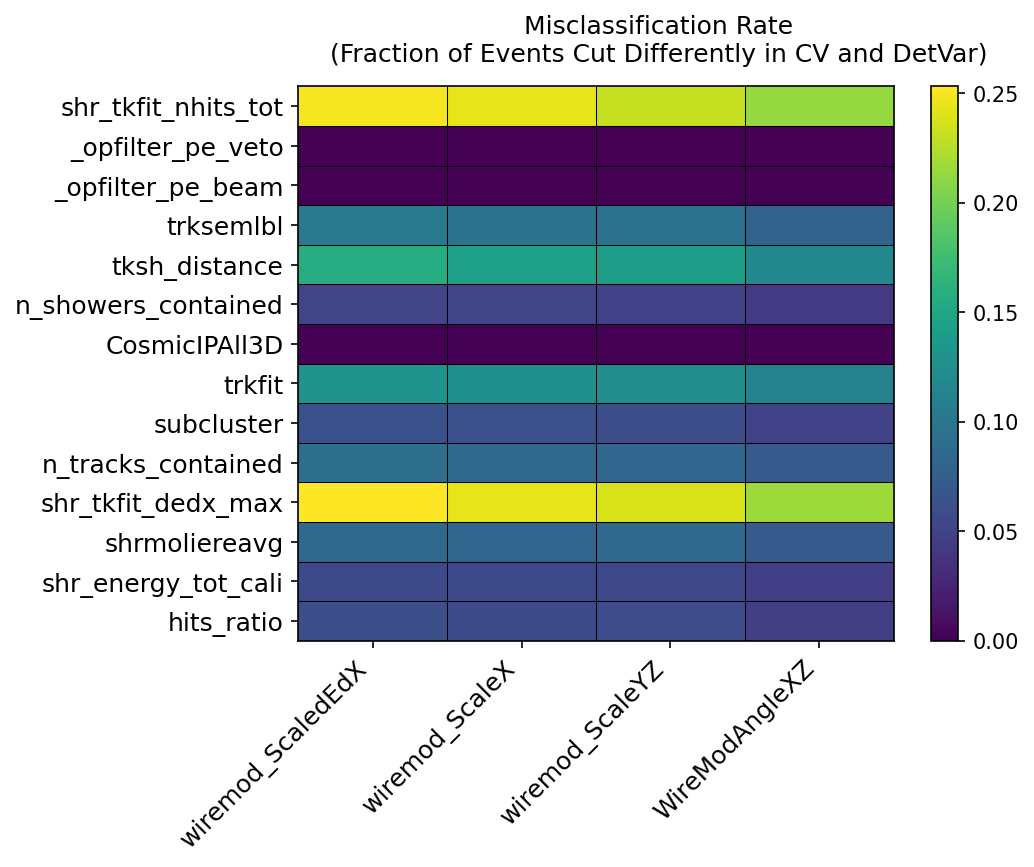

In [76]:
# Plot a 2d color mesh for the miscut matrix

fig, ax = plt.subplots(dpi=150)

x = np.arange(0,np.size(miscut_matrix, 1),1)
y = np.arange(0,np.size(miscut_matrix, 0),1)
z = miscut_matrix

colormesh = ax.pcolormesh(x,y,z)

ax.set_xticks(x)
ax.set_xticklabels(variation_titles[:-1], fontsize=12,rotation=45, ha='right')
ax.set_yticks(y)
ax.set_yticklabels(var_bounds.keys(), fontsize=12)


# Add black lines
for i in x[1:]:
    ax.axvline(x[i]-0.5, color='k', linewidth=0.5)
    
for i in y[1:]:
    ax.axhline(y[i]-0.5, color='k', linewidth=0.5)

fig.colorbar(colormesh)

fig.suptitle('Misclassification Rate\n(Fraction of Events Cut Differently in CV and DetVar)')

In [89]:
# Correlation Matrix (normal ordering)

# variable_list = list(var_bounds.keys())
variable_list = ['shrmoliereavg', 'n_tracks_contained', 'shr_tkfit_dedx_max', 'trkfit', 'tksh_distance', 'trksemlbl', 'shr_tkfit_nhits_tot']


variation_list = variation_titles[:-1]

num_variables = len(variable_list)
num_variations = len(variation_list)

# miscut_matrix = np.zeros((num_variables * num_variations, num_variables * num_variations))
correlation_matrix = np.zeros((num_variables * num_variations, num_variables * num_variations))

cv = df_list[-1].loc[shared_index_all]

labels = []

# We need every pair of (variable + variation combination)
    # var = variable (i, k)
    # detvar = variation (j, l)
for i, var_i in enumerate(variable_list):
    limits_i = var_bounds[var_i]['limits']
    limit_tag_i = var_bounds[var_i]['limit_tag']
    cv_array_i = np.array(cv[var_i])
    
    for j, detvar_j in enumerate(variation_list):
        detvar_array_j = np.array(df_list[j].loc[shared_index_all][var_i])
        
        index_ij = i*num_variations + j
        labels.append(f'{i}, {j}')
    
        for k, var_k in enumerate(variable_list):
            limits_k = var_bounds[var_k]['limits']
            limit_tag_k = var_bounds[var_k]['limit_tag']
            cv_array_k = np.array(cv[var_k])

            for l, detvar_l in enumerate(variation_list):
                detvar_array_l = np.array(df_list[l].loc[shared_index_all][var_k])
                
                index_kl = k*num_variations + l
#                 index_kl = l*num_variables + k
                
                # Now that we have collected all of the required data, we perform the misclassification calculation and map
                # the result to -1 (CV and DetVar have the same value) or +1 (CV and DetVar have different values)
                # Then we multiply the results from the two DetVar together and the mean of this array is the correlation
                
                misclassified_ij = isMisclassified(cv_array_i, detvar_array_j, limits_i, limit_tag_i).astype(int) * 2 - 1
                misclassified_kl = isMisclassified(cv_array_k, detvar_array_l, limits_k, limit_tag_k).astype(int) * 2 - 1
                
                correlation_ijkl = np.mean(misclassified_ij * misclassified_kl)
                
                correlation_matrix[index_ij][index_kl] = correlation_ijkl
#                 miscut_matrix[index_ij][index_kl] = 

In [85]:
# Correlation Matrix (inverted ordering)

# variable_list = list(var_bounds.keys())
variable_list = ['shrmoliereavg', 'n_tracks_contained', 'shr_tkfit_dedx_max', 'trkfit', 'tksh_distance', 'trksemlbl', 'shr_tkfit_nhits_tot']


variation_list = variation_titles[:-1]

num_variables = len(variable_list)
num_variations = len(variation_list)

# miscut_matrix = np.zeros((num_variables * num_variations, num_variables * num_variations))
correlation_matrix = np.zeros((num_variables * num_variations, num_variables * num_variations))

cv = df_list[-1].loc[shared_index_all]

labels = []

# We need every pair of (variable + variation combination)
    # var = variable (i, k)
    # detvar = variation (j, l)
for j, detvar_j in enumerate(variation_list):
    

    for i, var_i in enumerate(variable_list):
        
        detvar_array_j = np.array(df_list[j].loc[shared_index_all][var_i])    
        
        limits_i = var_bounds[var_i]['limits']
        limit_tag_i = var_bounds[var_i]['limit_tag']
        cv_array_i = np.array(cv[var_i])
    
        index_ij = j*num_variables + i
        labels.append(f'{i}, {j}')
        
        for l, detvar_l in enumerate(variation_list):
            

            for k, var_k in enumerate(variable_list):
                
                detvar_array_l = np.array(df_list[l].loc[shared_index_all][var_k])
                
                limits_k = var_bounds[var_k]['limits']
                limit_tag_k = var_bounds[var_k]['limit_tag']
                cv_array_k = np.array(cv[var_k])

                index_kl = l*num_variables + k
                
                # Now that we have collected all of the required data, we perform the misclassification calculation and map
                # the result to -1 (CV and DetVar have the same value) or +1 (CV and DetVar have different values)
                # Then we multiply the results from the two DetVar together and the mean of this array is the correlation
                
                misclassified_ij = isMisclassified(cv_array_i, detvar_array_j, limits_i, limit_tag_i).astype(int) * 2 - 1
                misclassified_kl = isMisclassified(cv_array_k, detvar_array_l, limits_k, limit_tag_k).astype(int) * 2 - 1
                
                correlation_ijkl = np.mean(misclassified_ij * misclassified_kl)
                
                correlation_matrix[index_ij][index_kl] = correlation_ijkl
#                 miscut_matrix[index_ij][index_kl] = 

   i             Variable
0  0        shrmoliereavg
1  1   n_tracks_contained
2  2   shr_tkfit_dedx_max
3  3               trkfit
4  4        tksh_distance
5  5            trksemlbl
6  6  shr_tkfit_nhits_tot
   j          Variation
0  0  wiremod_ScaledEdX
1  1     wiremod_ScaleX
2  2    wiremod_ScaleYZ
3  3     WireModAngleXZ


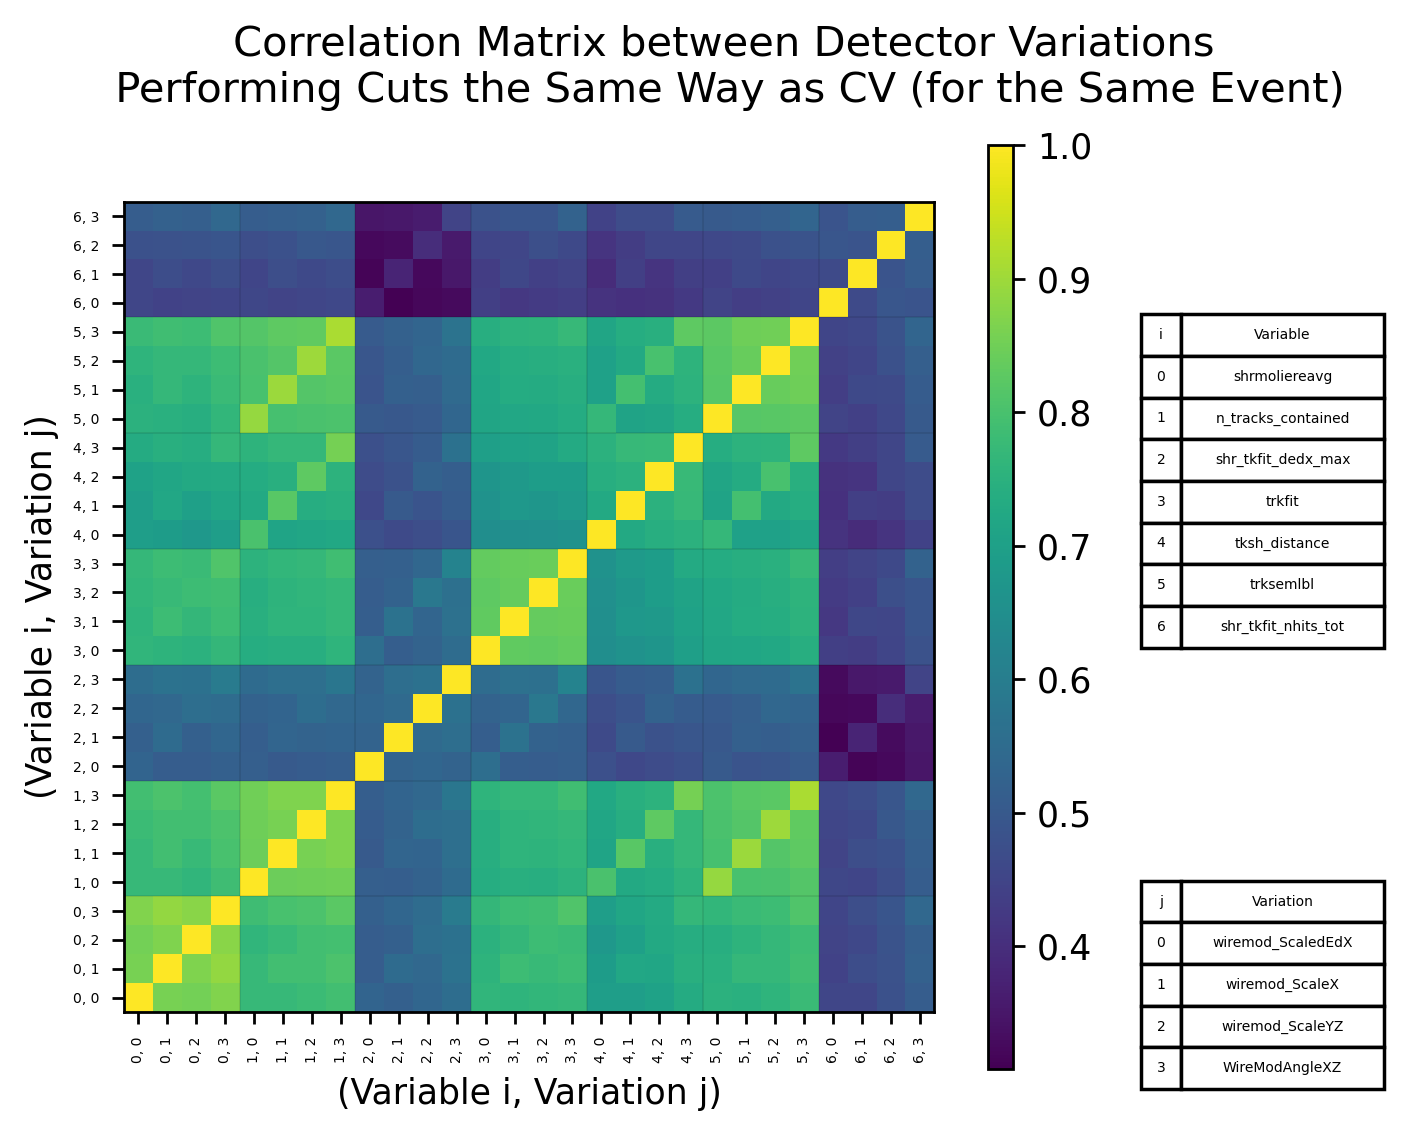

In [90]:
# Plot a 2d color mesh for the correlation matrix

fig = plt.figure(dpi=250)
gs = mpl.gridspec.GridSpec(2,4, width_ratios=[1, 0.03, 0.05, 0.25], height_ratios=[0.8, 0.2], wspace=0.2, hspace=0.2)

# Create the correlation matrix
ax_matrix = fig.add_subplot(gs[:,0])
ax_matrix.set_aspect('equal')

x = np.arange(0,np.size(correlation_matrix, 1),1)
y = np.arange(0,np.size(correlation_matrix, 0),1)
z = correlation_matrix

colormesh = ax_matrix.pcolormesh(x,y,z)

# Set the ticks
ax_matrix.set_xticks(x)
ax_matrix.set_xticklabels(labels, fontsize=4,rotation=90)
ax_matrix.set_yticks(y)
ax_matrix.set_yticklabels(labels, fontsize=4)

# Add black lines
lines = np.arange(0,np.size(correlation_matrix, 1), len(variation_list)) - 0.5 # Change which list to match the 2nd loop

for line in lines:
    ax_matrix.axvline(line, color='k', linewidth=0.05, alpha=1)
    ax_matrix.axhline(line, color='k', linewidth=0.05, alpha=1)
    
ax_matrix.set_xlabel('(Variable i, Variation j)')
ax_matrix.set_ylabel('(Variable i, Variation j)')
    
# Create the color bar
ax_cbar = fig.add_subplot(gs[:, 1])  

fig.colorbar(colormesh, cax=ax_cbar)

# Create the variable table
ax_table_var = fig.add_subplot(gs[0, 3])
ax_table_var.axis('off')
df = pd.DataFrame({'i':range(len(variable_list)), 'Variable':variable_list})
print(df)
table = ax_table_var.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

# table[(1, 0)].get_text().set_fontsize(8)
# table[(1, 1)].get_text().set_fontsize(8)

for row in range(len(df) + 1): # (+1 to include header row)
    table[(row, 0)].set_width(0.2)
    table[(row, 1)].set_width(1.0)

# Create the variation table
ax_table_detvar = fig.add_subplot(gs[1, 3])
ax_table_detvar.axis('off')
df = pd.DataFrame({'j':range(len(variation_list)), 'Variation':variation_list})
print(df)
table = ax_table_detvar.table(cellText=df.values, colLabels=df.columns, loc='center', cellLoc='center')

for row in range(len(df) + 1):  # (+1 to include header row)
    table[(row, 0)].set_width(0.2)
    table[(row, 1)].set_width(1.0) 

fig.suptitle('Correlation Matrix between Detector Variations\n Performing Cuts the Same Way as CV (for the Same Event)');

## Picking out events to look at EventDisplay

In [161]:
selection_var = 'shr_tkfit_dedx_max'
selection_variation_index = 1

# Configuration of selection (set to None if unused)
cv_target = None 
cv_extreme = 6
detvar_target = 2
detvar_extreme = None
buffer = 0.25 # Buffer region around the target (must exist if either target is active)

selection_title = f"Selection on {selection_var}: "
if cv_target:
    selection_title += f'\n = {cv_target} ± {buffer} in CV'
    
if cv_extreme:
    selection_title += f'\n > {cv_extreme} in CV'
    
if detvar_target:
    selection_title += f'\n = {detvar_target} ± {buffer} in {variation_titles[selection_variation_index]}'
    
if detvar_extreme:
    selection_title += f'\n > {detvar_extreme} in {variation_titles[selection_variation_index]}'
    
print(selection_title)

df_detvar = df_list[selection_variation_index].loc[shared_index_all] # Start with the list of all of the events shared with all variations
df_cv = df_list[-1].loc[shared_index_all]

# Filter the dataframes to just the events within the target region
if cv_target:
    df_cv = df_cv[(df_cv[selection_var] > cv_target - buffer) & (df_cv[selection_var] < cv_target + buffer)]
if detvar_target:
    df_detvar = df_detvar[(df_detvar[selection_var] > detvar_target - buffer) & (df_detvar[selection_var] < detvar_target + buffer)]

# Filter the dataframes to just the events above the extremes
if cv_extreme:
    df_cv = df_cv[df_cv[selection_var] > cv_extreme]
if detvar_extreme:
    df_detvar = df_detvar[df_detvar[selection_var] > detvar_extreme]

# filter_index = ((df_detvar[selection_var] - df_cv[selection_var] > difference) | (df_detvar[selection_var] - df_cv[selection_var] < -difference))

target_index = df_detvar.index.intersection(df_cv.index)
target_index = target_index.intersection(temp3)

print(f'Selecting randomly from {len(target_index)} candidates')

random_index = random.randint(0,len(target_index)-1)

df_variations = pd.DataFrame(columns=list(df_cv.columns) + ['variation'])
for i in range(len(df_list)):
    
    df = df_list[i].loc[target_index]
    
    df = df.iloc[[random_index]]
    
    df['variation'] = variation_titles[i]
    
#     df_variations = df
    df_variations = df_variations.append(df, ignore_index=True)
    
df_variations = df_variations.set_index('variation')

print(df_variations.loc[:,['evt', 'run', 'sub', selection_var]])

# Verify the uniqueness of 

Selection on shr_tkfit_dedx_max: 
 > 6 in CV
 = 2 ± 0.25 in wiremod_ScaleX
Selecting randomly from 0 candidates


ValueError: empty range for randrange() (0,0, 0)

In [160]:
df = df_list[1].loc[temp_index, ['evt','run', 'sub', selection_var]]
df2 = df_list[1].loc[temp_index2, ['evt','run', 'sub', selection_var]]

df['run-subrun'] = df['run']* 1000 + df['sub']
df2['run-subrun'] = df2['run']* 1000 + df2['sub']

df = df.set_index('run-subrun')
df2 = df2.set_index('run-subrun')

temp3 = df.index.intersection(df2.index)
print(df.loc[temp3])
print(df2.loc[temp3])

              evt   run  sub  shr_tkfit_dedx_max
run-subrun                                      
7006162      8129  7006  162            7.702468
7008445     22281  7008  445            8.440595
7008910     45537  7008  910            6.755743
7003364     18213  7003  364            7.475104
7006335     16778  7006  335           10.072648
7003053      2661  7003   53            7.288133
7006240     12006  7006  240            8.568796
7006240     12037  7006  240           11.363008
7004843     42195  7004  843            6.579369
7008681     34067  7008  681            6.027220
6769205     10295  6769  205            6.125644
7006108      5442  7006  108            8.478819
6874122      6145  6874  122            8.931335
7010003       164  7010    3           14.943601
7010003       167  7010    3           12.747416
7008309     15471  7008  309            7.935001
              evt   run  sub  shr_tkfit_dedx_max
run-subrun                                      
7006162      8131  7